# Feature selection Complexity evaluation: Artificial datasets

In [31]:
import pandas as pd
import copy
from sklearn import preprocessing
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.feature_selection import mutual_info_classif, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from skrebate import ReliefF
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import glob
import re



In [3]:
import os
os.chdir("..")
root_path = os.getcwd()

In [14]:
# # Cargar la tabla de comparación del dataset
# comparison_table = pd.read_csv("Results_FS_ComplexityEvaluation/ArtificialDataset1_comparisonTable.csv", index_col=[0,1])
#
# comparison_table.head()
# display(comparison_table.style.background_gradient(cmap="viridis"))

In [9]:
# Leer todos los comparison.csv de la carpeta
files = glob.glob("Results_FS_ComplexityEvaluation/*_comparisonTable.csv")

all_tables = []
for f in files:
    df = pd.read_csv(f, index_col=[0,1])
    all_tables.append(df)

comparison_all = pd.concat(all_tables)
comparison_all.head()


Hostility       kDN  \
Dataset             Subset                                                 
ArtificialDataset11 all                               0.102667  0.134067   
                    informative                       0.057667  0.096600   
                    informative+redundant             0.077333  0.097933   
                    informative+redundant_nonLinear   0.090667  0.114133   
                    informative+noise                 0.152333  0.216800   

                                                          DCP      TD_U  \
Dataset             Subset                                                
ArtificialDataset11 all                              0.137145  0.617278   
                    informative                      0.174364  0.549833   
                    informative+redundant            0.082306  0.632574   
                    informative+redundant_nonLinear  0.162890  0.601078   
                    informative+noise                0.174364  0.583981   

                                                          CLD        N1  \
Dataset             Subset                                                
ArtificialDataset11 all                              0.313331  0.098857   
                    informative                      0.274323  0.061933   
                    informative+redundant            0.294132  0.062466   
                    informative+redundant_nonLinear  0.323926  0.089169   
                    informative+noise                0.274573  0.181821   

                                                           N2       LSC  \
Dataset             Subset                                                
ArtificialDataset11 all                              0.467980  0.992091   
                    informative                      0.442667  0.989020   
                    informative+redundant            0.440410  0.988053   
                    informative+redundant_nonLinear  0.446957  0.990826   
                    informative+noise                0.481774  0.996506   

                                                           F1        L1  \
Dataset             Subset                                                
ArtificialDataset11 all                              0.994827  0.435555   
                    informative                      0.994350  0.571514   
                    informative+redundant            0.993275  1.027321   
                    informative+redundant_nonLinear  0.994686  0.482813   
                    informative+noise                0.996025  0.574145   

                                                     n_features best_model  \
Dataset             Subset                                                   
ArtificialDataset11 all                                    75.0    SVM-rbf   
                    informative                            20.0    SVM-rbf   
                    informative+redundant                  40.0    SVM-rbf   
                    informative+redundant_nonLinear        35.0    SVM-rbf   
                    informative+noise                      40.0    SVM-rbf   

                                                     best_acc  best_gps  
Dataset             Subset                                               
ArtificialDataset11 all                              0.969667  0.968148  
                    informative                      0.985667  0.985050  
                    informative+redundant            0.984000  0.983313  
                    informative+redundant_nonLinear  0.963333  0.961479  
                    informative+noise                0.950667  0.948137

## Artificial Dataset 1

- Nº muestras: 1000
- Características: 10 informativas, 2 ruido, 4 redundantes lineales, 2 redundantes no lineales --> 18 en total
- Separabilidad (class_sep): 1 (alta)
- Ruido en etiquetas (flip_y): 0
- Clusters/clase: 1
- Balance de clases: [0.5, 0.5] (equilibrado)
- Ruido adicional (noise_std): 0.01

In [13]:
# comparison_all.loc['ArtificialDataset1']
display(comparison_all.loc['ArtificialDataset1'].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_model,best_acc,best_gps
Subset,,,,,,,,,,,,,,
all,0.053000,0.067600,0.014592,0.683000,0.130850,0.051136,0.400369,0.957305,0.974167,0.827546,18.000000,SVM-rbf,0.985000,0.985000
informative,0.030000,0.051000,0.016597,0.599091,0.146010,0.033283,0.373701,0.944228,0.974700,0.695393,10.000000,SVM-rbf,0.990000,0.990000
informative+redundant,0.034000,0.052600,0.071380,0.634091,0.160102,0.033033,0.372805,0.944834,0.971857,0.213365,14.000000,SVM-rbf,0.985000,0.985000
informative+redundant_nonLinear,0.033000,0.053800,0.044297,0.645200,0.122669,0.034333,0.378490,0.954427,0.973750,0.720168,12.000000,SVM-rbf,0.988000,0.988000
informative+noise,0.042000,0.066400,0.098407,0.550667,0.141574,0.043424,0.407718,0.962517,0.978167,0.664564,12.000000,SVM-rbf,0.985000,0.985000
informative+rand_extra,0.041000,0.061600,0.115777,0.651909,0.156166,0.048252,0.389093,0.950224,0.971462,0.806370,13.000000,SVM-rbf,0.988000,0.988000
mutual_info_top10,0.062000,0.078000,0.079583,0.535615,0.138735,0.073167,0.364963,0.951343,0.959200,0.487987,10.000000,SVM-rbf,0.966000,0.965999
f_classif_top10,0.085000,0.101400,0.121962,0.569000,0.156301,0.078262,0.379290,0.949639,0.964400,0.568725,10.000000,SVM-rbf,0.953000,0.952989
rf_top10,0.054000,0.056800,0.075895,0.588833,0.134775,0.050867,0.353003,0.934391,0.960600,0.529653,10.000000,SVM-rbf,0.974000,0.974000


## Artificial Dataset 2

 - Nº muestras: 1000
 - Características: 10 informativas, 2 ruido, 4 redundantes lineales, 2 redundantes no lineales --> 18 en total
 - Separabilidad (class_sep): 0.6 (más difícil de separar)
 - Ruido en etiquetas: 0
 - Clusters/clase: 1
 - Balance: [0.5, 0.5]
 - Ruido adicional: 0.01

In [15]:
display(comparison_all.loc['ArtificialDataset2'].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_model,best_acc,best_gps
Subset,,,,,,,,,,,,,,
all,0.119000,0.124600,0.017584,0.586462,0.223553,0.095390,0.422998,0.975741,0.982056,0.514070,18.000000,SVM-rbf,0.967000,0.966999
informative,0.078000,0.107400,0.088088,0.593333,0.249648,0.067752,0.402904,0.971353,0.983600,0.422721,10.000000,SVM-rbf,0.977000,0.976999
informative+redundant,0.083000,0.114800,0.071020,0.582846,0.263726,0.093226,0.402589,0.971677,0.982000,0.503090,14.000000,SVM-rbf,0.967000,0.967000
informative+redundant_nonLinear,0.066000,0.109200,0.060523,0.623583,0.224099,0.083550,0.403429,0.973709,0.981167,0.431576,12.000000,SVM-rbf,0.970000,0.969994
informative+noise,0.101000,0.137400,0.088088,0.597500,0.245478,0.090355,0.429860,0.979780,0.985583,0.450263,12.000000,SVM-rbf,0.965000,0.964998
informative+rand_extra,0.091000,0.126000,0.076374,0.598154,0.254149,0.092169,0.417547,0.975601,0.982077,0.501690,13.000000,SVM-rbf,0.962000,0.961994
mutual_info_top10,0.111000,0.147400,0.146688,0.483000,0.233970,0.137000,0.396735,0.970561,0.974700,0.109500,10.000000,RandomForest,0.919000,0.918993
f_classif_top10,0.165000,0.188400,0.154398,0.460625,0.278496,0.170300,0.419076,0.977884,0.978600,0.565846,10.000000,SVM-rbf,0.895000,0.894938
rf_top10,0.085000,0.113400,0.103673,0.594667,0.229343,0.104533,0.384135,0.958355,0.973700,0.068930,10.000000,SVM-rbf,0.946000,0.946000


## Artificial Dataset 3

 - Nº muestras: 1000
 - Características: 25 informativas, 5 ruido, 7 redundantes lineales, 8 redundantes no lineales --> 45 en total
 - Separabilidad: 1
 - Ruido en etiquetas: 0
 - Clusters/clase: 1
 - Balance: [0.5, 0.5]
 - Ruido adicional: 0.05

In [16]:
display(comparison_all.loc['ArtificialDataset3'].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_model,best_acc,best_gps
Subset,,,,,,,,,,,,,,
all,0.075000,0.093800,0.067889,0.651231,0.146585,0.058518,0.457602,0.976888,0.988822,1.311366,45.000000,SVM-rbf,0.980000,0.979998
informative,0.056000,0.076800,0.004889,0.652923,0.140096,0.037496,0.445379,0.968942,0.986720,0.818155,25.000000,SVM-rbf,0.993000,0.993000
informative+redundant,0.041000,0.076000,0.116916,0.660692,0.128885,0.050116,0.445412,0.969743,0.987812,1.136142,32.000000,SVM-rbf,0.989000,0.989000
informative+redundant_nonLinear,0.095000,0.085800,0.063444,0.638385,0.171068,0.049038,0.447555,0.974094,0.987636,0.852132,33.000000,SVM-rbf,0.978000,0.977997
informative+noise,0.070000,0.100400,0.067468,0.653308,0.141118,0.072137,0.459966,0.977409,0.987700,0.815994,30.000000,SVM-rbf,0.987000,0.987000
informative+rand_extra,0.073000,0.079200,0.092549,0.659231,0.151275,0.049240,0.449359,0.972810,0.986536,0.845118,28.000000,SVM-rbf,0.990000,0.990000
mutual_info_top25,0.078000,0.093600,0.100739,0.642692,0.150114,0.067980,0.440411,0.968158,0.985840,1.193970,25.000000,SVM-rbf,0.976000,0.975994
f_classif_top25,0.103000,0.120400,0.113151,0.644538,0.161668,0.099404,0.444032,0.973198,0.986240,1.216356,25.000000,SVM-rbf,0.948000,0.947995
rf_top25,0.069000,0.095400,0.106385,0.645923,0.150725,0.073163,0.436885,0.966267,0.985880,1.250675,25.000000,SVM-rbf,0.970000,0.969994


## Artificial Dataset 4

 - Nº muestras: 5000
 - Características: 15 informativas, 15 ruido, 4 redundantes lineales, 5 redundantes no lineales --> 39 en total
 - Separabilidad: 1
 - Ruido en etiquetas: 0
 - Clusters/clase: 1
 - Balance: [0.5, 0.5]
 - Ruido adicional: 0.01

In [17]:
display(comparison_all.loc['ArtificialDataset4'].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_model,best_acc,best_gps
Subset,,,,,,,,,,,,,,
all,0.051400,0.070200,0.069604,0.591400,0.135136,0.055907,0.453021,0.986881,0.996000,1.235161,39.000000,SVM-rbf,0.984400,0.984400
informative,0.017000,0.026120,0.068687,0.607129,0.111095,0.019746,0.390056,0.966053,0.994013,0.934909,15.000000,SVM-rbf,0.992200,0.992200
informative+redundant,0.022600,0.030320,0.071504,0.652338,0.117719,0.021621,0.388564,0.962146,0.993758,1.148255,19.000000,SVM-rbf,0.990400,0.990400
informative+redundant_nonLinear,0.019200,0.030760,0.062060,0.646625,0.152815,0.023953,0.394596,0.972049,0.994450,0.946523,20.000000,SVM-rbf,0.990800,0.990800
informative+noise,0.059400,0.090800,0.070670,0.646424,0.110685,0.073674,0.462659,0.992850,0.996467,0.938998,30.000000,SVM-rbf,0.983000,0.982999
informative+rand_extra,0.026600,0.035560,0.070708,0.605624,0.112943,0.028737,0.410345,0.975765,0.994822,0.934111,18.000000,SVM-rbf,0.989400,0.989400
mutual_info_top15,0.041000,0.059000,0.082380,0.553800,0.131712,0.053050,0.389859,0.968821,0.992000,1.055809,15.000000,SVM-rbf,0.977200,0.977200
f_classif_top15,0.048400,0.066360,0.084325,0.597094,0.143144,0.056730,0.388710,0.970778,0.992600,1.139477,15.000000,SVM-rbf,0.972600,0.972600
rf_top15,0.034800,0.048640,0.072787,0.572722,0.135241,0.039945,0.383873,0.962935,0.992253,1.010122,15.000000,SVM-rbf,0.984200,0.984200


## Artificial Dataset 5

 - Nº muestras: 5000
 - Características: 25 informativas, 15 ruido, 8 redundantes lineales, 7 redundantes no lineales --> 55 en total
 - Separabilidad: 1
 - Ruido en etiquetas: 0
 - Clusters/clase: 1
 - Balance: [0.5, 0.5]
 - Ruido adicional: 0.05

In [18]:
display(comparison_all.loc['ArtificialDataset5'].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_model,best_acc,best_gps
Subset,,,,,,,,,,,,,,
all,0.045200,0.063200,0.070005,0.738907,0.137243,0.041427,0.462571,0.991320,0.996404,0.998180,55.000000,SVM-rbf,0.996800,0.996800
informative,0.017000,0.026640,0.074001,0.733243,0.101268,0.017326,0.430886,0.981555,0.994920,0.967018,25.000000,SVM-rbf,0.998000,0.998000
informative+redundant,0.024200,0.036280,0.071639,0.695707,0.124553,0.020636,0.434550,0.985093,0.995315,0.660136,33.000000,SVM-rbf,0.997600,0.997600
informative+redundant_nonLinear,0.019400,0.029920,0.074975,0.679987,0.129097,0.017577,0.432019,0.982881,0.995256,0.946439,32.000000,SVM-rbf,0.996400,0.996400
informative+noise,0.048800,0.079920,0.071905,0.711787,0.102473,0.057720,0.467393,0.993351,0.996365,0.929800,40.000000,SVM-rbf,0.996000,0.996000
informative+rand_extra,0.022600,0.033120,0.074361,0.730600,0.102533,0.020596,0.439285,0.984428,0.995214,0.954220,28.000000,SVM-rbf,0.997800,0.997800
mutual_info_top25,0.037200,0.051440,0.084911,0.655682,0.137398,0.040043,0.427767,0.980090,0.993624,0.783402,25.000000,SVM-rbf,0.991200,0.991200
f_classif_top25,0.057200,0.063360,0.089590,0.680612,0.141000,0.047219,0.433377,0.981745,0.993960,0.741196,25.000000,SVM-rbf,0.989000,0.989000
rf_top25,0.028200,0.038360,0.075603,0.728907,0.137670,0.027572,0.417874,0.976975,0.993624,0.942469,25.000000,SVM-rbf,0.992200,0.992200


## Artificial Dataset 6

 - Nº muestras: 10000
 - Características: 8 informativas, 15 ruido, 4 redundantes lineales, 5 redundantes no lineales --> 32 en total
 - Separabilidad: 1
 - Ruido en etiquetas: 0
 - Clusters/clase: 1
 - Balance: [0.5, 0.5]
 - Ruido adicional: 0.01

In [19]:
display(comparison_all.loc['ArtificialDataset6'].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_model,best_acc,best_gps
Subset,,,,,,,,,,,,,,
all,0.026000,0.041540,0.021839,0.501524,0.072115,0.036949,0.436539,0.987601,0.990166,1.196410,32.000000,SVM-linear,0.998400,0.998400
informative,0.003300,0.004500,0.036050,0.675800,0.033655,0.003812,0.268677,0.924672,0.989012,0.995970,8.000000,SVM-rbf,0.998900,0.998900
informative+redundant,0.003300,0.007040,0.024020,0.626171,0.087189,0.006210,0.282067,0.950230,0.986558,1.104500,12.000000,SVM-rbf,0.998800,0.998800
informative+redundant_nonLinear,0.003600,0.005920,0.023555,0.606731,0.077132,0.005865,0.272946,0.923957,0.982123,1.065472,13.000000,SVM-rbf,0.998600,0.998600
informative+noise,0.046300,0.065580,0.036050,0.617800,0.033540,0.053962,0.454241,0.995771,0.995791,1.008324,23.000000,SVM-linear,0.998500,0.998500
informative+rand_extra,0.006500,0.009520,0.035588,0.677693,0.049166,0.008868,0.331454,0.955937,0.991745,1.018106,11.000000,SVM-rbf,0.999000,0.999000
mutual_info_top8,0.003700,0.009340,0.022310,0.517386,0.088160,0.008170,0.237009,0.931346,0.966350,1.151702,8.000000,SVM-linear,0.997600,0.997600
f_classif_top8,0.005300,0.011960,0.029644,0.516873,0.091044,0.010637,0.241843,0.946227,0.980213,1.153502,8.000000,SVM-linear,0.997300,0.997300
rf_top8,0.004700,0.007020,0.024682,0.577785,0.046384,0.007183,0.223549,0.892870,0.964463,1.124101,8.000000,SVM-rbf,0.998200,0.998200


## Artificial Dataset 7

 - Nº muestras: 1000
 - Características: 20 informativas, 10 ruido, 10 redundantes lineales, 10 redundantes no lineales --> 50 en total
 - Separabilidad: 1
 - Ruido en etiquetas: 0
 - Clusters/clase: 1
 - Balance: [0.5, 0.5]
 - Ruido adicional: 0.05

In [20]:
display(comparison_all.loc['ArtificialDataset7'].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_model,best_acc,best_gps
Subset,,,,,,,,,,,,,,
all,0.036000,0.053800,0.057824,0.708273,0.117457,0.031383,0.445424,0.959711,0.986100,1.338937,50.000000,SVM-rbf,0.996000,0.996000
informative,0.008000,0.027200,0.047885,0.740700,0.067308,0.018279,0.411489,0.931018,0.981650,1.009091,20.000000,SVM-rbf,0.999000,0.999000
informative+redundant,0.032000,0.034200,0.040974,0.700455,0.096647,0.017243,0.413545,0.940421,0.983233,1.095114,30.000000,SVM-rbf,1.000000,1.000000
informative+redundant_nonLinear,0.047000,0.032200,0.046247,0.683273,0.097992,0.016926,0.416217,0.941339,0.983167,1.090441,30.000000,SVM-rbf,0.997000,0.997000
informative+noise,0.049000,0.062200,0.051221,0.658154,0.069280,0.048519,0.453899,0.968383,0.985967,1.013354,30.000000,SVM-rbf,0.997000,0.997000
informative+rand_extra,0.010000,0.031400,0.056568,0.713727,0.073469,0.025265,0.419688,0.941006,0.982478,1.041631,23.000000,SVM-rbf,0.999000,0.999000
mutual_info_top20,0.040000,0.046200,0.042031,0.711727,0.100209,0.039433,0.398437,0.930962,0.976300,1.114214,20.000000,SVM-rbf,0.992000,0.991999
f_classif_top20,0.032000,0.041200,0.041620,0.734100,0.088976,0.030242,0.394613,0.929431,0.975900,0.789292,20.000000,SVM-rbf,0.988000,0.988000
rf_top20,0.032000,0.034400,0.041892,0.763100,0.095516,0.026110,0.393492,0.932988,0.976750,0.854760,20.000000,SVM-rbf,0.992000,0.992000


## Artificial Dataset 8

 - Nº muestras: 1000
 - Características: 40 informativas, 15 ruido, 15 redundantes lineales, 15 redundantes no lineales --> 85 en total
 - Separabilidad: 1
 - Ruido en etiquetas: 0
 - Clusters/clase: 1
 - Balance: [0.5, 0.5]
 - Ruido adicional: 0.1

In [21]:
display(comparison_all.loc['ArtificialDataset8'].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_model,best_acc,best_gps
Subset,,,,,,,,,,,,,,
all,0.128000,0.176600,0.255695,0.652000,0.275554,0.129847,0.478692,0.987226,0.991965,1.090318,85.000000,SVM-rbf,0.951000,0.950968
informative,0.053000,0.128000,0.206128,0.616000,0.224660,0.091075,0.468715,0.983293,0.991350,0.788417,40.000000,SVM-rbf,0.985000,0.984999
informative+redundant,0.123000,0.147600,0.077575,0.643750,0.259294,0.106194,0.469732,0.985064,0.991364,0.861586,55.000000,SVM-rbf,0.964000,0.963990
informative+redundant_nonLinear,0.124000,0.146800,0.125087,0.672231,0.263214,0.097378,0.469973,0.984499,0.991636,0.855719,55.000000,SVM-rbf,0.964000,0.963982
informative+noise,0.120000,0.180800,0.206128,0.616214,0.225714,0.118507,0.480132,0.989130,0.992000,0.798303,55.000000,SVM-rbf,0.969000,0.968993
informative+rand_extra,0.083000,0.131400,0.140134,0.639857,0.231087,0.093153,0.469016,0.983543,0.991488,0.805808,43.000000,SVM-rbf,0.981000,0.980999
mutual_info_top40,0.170000,0.213600,0.255695,0.563067,0.281582,0.179189,0.471957,0.987146,0.990725,1.325917,40.000000,SVM-rbf,0.912000,0.911935
f_classif_top40,0.173000,0.203800,0.255695,0.649250,0.280236,0.187630,0.470602,0.986627,0.991050,0.370793,40.000000,SVM-rbf,0.915000,0.914858
rf_top40,0.189000,0.175000,0.144856,0.533733,0.274082,0.147699,0.465574,0.984932,0.990050,0.897834,40.000000,SVM-rbf,0.928000,0.927920


## Artificial Dataset 9

 - Nº muestras: 3000
 - Características: 10 informativas, 20 ruido, 20 redundantes lineales, 20 redundantes no lineales --> 70 en total
 - Separabilidad: 0.7 (moderada)
 - Ruido en etiquetas: 0
 - Clusters/clase: 1
 - Balance: [0.5, 0.5]
 - Ruido adicional: 0.3

In [22]:
display(comparison_all.loc['ArtificialDataset9'].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_model,best_acc,best_gps
Subset,,,,,,,,,,,,,,
all,0.095333,0.121067,0.108383,0.627511,0.314066,0.095396,0.458585,0.986819,0.991962,0.486696,70.000000,XGBoost,0.963000,0.963000
informative,0.043333,0.068600,0.070806,0.536417,0.247868,0.057011,0.383627,0.970831,0.988700,0.492368,10.000000,SVM-rbf,0.977667,0.977666
informative+redundant,0.069333,0.084867,0.064838,0.649133,0.319023,0.063540,0.409137,0.980127,0.988967,0.668633,30.000000,XGBoost,0.967667,0.967667
informative+redundant_nonLinear,0.084333,0.087533,0.121917,0.633714,0.281394,0.068062,0.409402,0.979809,0.989978,0.473403,30.000000,XGBoost,0.964000,0.963999
informative+noise,0.182667,0.236667,0.063926,0.535157,0.247209,0.201594,0.481259,0.996496,0.994767,0.461720,30.000000,XGBoost,0.957000,0.956999
informative+rand_extra,0.064333,0.079933,0.069412,0.481895,0.284847,0.063162,0.395223,0.977713,0.989872,0.462022,13.000000,SVM-rbf,0.969000,0.968997
mutual_info_top10,0.131000,0.163733,0.122040,0.557529,0.268825,0.146147,0.406011,0.979306,0.979600,0.801452,10.000000,SVM-rbf,0.888333,0.888314
f_classif_top10,0.125667,0.164200,0.115777,0.502685,0.341147,0.150329,0.409645,0.983070,0.988700,0.732240,10.000000,SVM-rbf,0.898000,0.897978
rf_top10,0.123000,0.141800,0.096367,0.512500,0.235542,0.135241,0.396977,0.976811,0.978600,0.685279,10.000000,SVM-rbf,0.916667,0.916651


## Artificial Dataset 10

 - Nº muestras: 2000
 - Características: 6 informativas, 20 ruido, 20 redundantes lineales, 15 redundantes no lineales --> 61 en total
 - Separabilidad: 0.8
 - Ruido en etiquetas: 0
 - Clusters/clase: 2
 - Balance: [0.3, 0.7] (desbalanceado)
 - Ruido adicional: 0.3

In [23]:
display(comparison_all.loc['ArtificialDataset10'].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_model,best_acc,best_gps
Subset,,,,,,,,,,,,,,
all,0.115500,0.158400,0.131401,0.717500,0.312744,0.153678,0.457392,0.981472,0.991574,0.563725,61.000000,XGBoost,0.917000,0.894530
informative,0.079500,0.125100,0.159981,0.575167,0.280286,0.119875,0.364366,0.970477,0.988167,0.665170,6.000000,SVM-rbf,0.926500,0.904188
informative+redundant,0.093000,0.137300,0.172058,0.563594,0.318785,0.115033,0.401360,0.975433,0.988000,0.525712,26.000000,XGBoost,0.911500,0.888649
informative+redundant_nonLinear,0.118500,0.137600,0.163253,0.628500,0.308149,0.122238,0.403353,0.975894,0.990333,0.635005,21.000000,RandomForest,0.911000,0.885123
informative+noise,0.229000,0.286000,0.159981,0.622687,0.280023,0.264936,0.483063,0.996408,0.994577,0.670839,26.000000,XGBoost,0.905000,0.878846
informative+rand_extra,0.109000,0.130700,0.151666,0.493750,0.320133,0.118350,0.375710,0.975630,0.987222,0.679638,9.000000,XGBoost,0.913500,0.891227
mutual_info_top6,0.131500,0.190700,0.170884,0.550333,0.283375,0.179933,0.398230,0.983496,0.986750,1.544125,6.000000,XGBoost,0.867500,0.829988
f_classif_top6,0.182500,0.239200,0.259523,0.546158,0.310672,0.241450,0.420356,0.990419,0.985083,1.604318,6.000000,RandomForest,0.824500,0.765831
rf_top6,0.117500,0.154200,0.146508,0.577094,0.251069,0.143767,0.362956,0.974522,0.991167,0.888374,6.000000,XGBoost,0.891000,0.861091


## Artificial Dataset 11

 - Nº muestras: 3000
 - Características: 20 informativas, 20 ruido, 20 redundantes lineales, 15 redundantes no lineales --> 75 en total
 - Separabilidad: 0.6 (difícil)
 - Ruido en etiquetas: 0
 - Clusters/clase: 1
 - Balance: [0.4, 0.6]
 - Ruido adicional: 0.1

In [24]:
display(comparison_all.loc['ArtificialDataset11'].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_model,best_acc,best_gps
Subset,,,,,,,,,,,,,,
all,0.102667,0.134067,0.137145,0.617278,0.313331,0.098857,0.467980,0.992091,0.994827,0.435555,75.000000,SVM-rbf,0.969667,0.968148
informative,0.057667,0.096600,0.174364,0.549833,0.274323,0.061933,0.442667,0.989020,0.994350,0.571514,20.000000,SVM-rbf,0.985667,0.985050
informative+redundant,0.077333,0.097933,0.082306,0.632574,0.294132,0.062466,0.440410,0.988053,0.993275,1.027321,40.000000,SVM-rbf,0.984000,0.983313
informative+redundant_nonLinear,0.090667,0.114133,0.162890,0.601078,0.323926,0.089169,0.446957,0.990826,0.994686,0.482813,35.000000,SVM-rbf,0.963333,0.961479
informative+noise,0.152333,0.216800,0.174364,0.583981,0.274573,0.181821,0.481774,0.996506,0.996025,0.574145,40.000000,SVM-rbf,0.950667,0.948137
informative+rand_extra,0.074000,0.094933,0.171039,0.547444,0.284160,0.066343,0.442010,0.988446,0.994116,0.536003,23.000000,SVM-rbf,0.976667,0.975600
mutual_info_top20,0.146667,0.175867,0.200009,0.538733,0.332158,0.143918,0.447965,0.991773,0.991183,0.763727,20.000000,SVM-rbf,0.936667,0.933037
f_classif_top20,0.143667,0.179267,0.107852,0.560389,0.335749,0.157752,0.449300,0.992544,0.991383,0.570906,20.000000,SVM-rbf,0.940667,0.937365
rf_top20,0.117000,0.153667,0.100421,0.486950,0.284050,0.137669,0.443139,0.990479,0.991250,0.383535,20.000000,SVM-rbf,0.941333,0.938030


## Artificial Dataset 12

 - Nº muestras: 3000
 - Características: 25 informativas, 30 ruido, 30 redundantes lineales, 30 redundantes no lineales --> 115 en total
 - Separabilidad: 0.9
 - Ruido en etiquetas: 0.2 (20%)
 - Clusters/clase: 1
 - Balance: [0.4, 0.6]
 - Ruido adicional: 0.5

In [25]:
display(comparison_all.loc['ArtificialDataset12'].style.background_gradient(cmap="viridis"))

,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_model,best_acc,best_gps
Subset,,,,,,,,,,,,,,
all,0.178000,0.271000,0.305528,0.555173,0.380491,0.253213,0.488572,0.997334,0.997519,0.473568,115.000000,SVM-rbf,0.871000,0.864941
informative,0.143000,0.234333,0.278586,0.535712,0.346237,0.213641,0.474360,0.996675,0.997480,0.482905,25.000000,SVM-rbf,0.886333,0.881665
informative+redundant,0.161667,0.250000,0.305343,0.572188,0.362974,0.232888,0.480144,0.997097,0.997539,0.458568,55.000000,SVM-rbf,0.878000,0.872536
informative+redundant_nonLinear,0.178667,0.256733,0.341377,0.490160,0.385091,0.232103,0.480117,0.997052,0.997212,0.521940,55.000000,SVM-rbf,0.868333,0.861908
informative+noise,0.203667,0.309533,0.322540,0.525551,0.349617,0.292228,0.491331,0.998033,0.997770,0.498972,55.000000,SVM-rbf,0.866000,0.859095
informative+rand_extra,0.145000,0.237000,0.276547,0.523288,0.351661,0.215063,0.476860,0.996754,0.997560,0.482581,28.000000,SVM-rbf,0.884667,0.879867
mutual_info_top25,0.226000,0.311600,0.286292,0.489806,0.380764,0.305363,0.482279,0.997743,0.996387,0.546866,25.000000,SVM-rbf,0.818333,0.807023
f_classif_top25,0.223000,0.297333,0.280797,0.590772,0.380221,0.278638,0.478682,0.997433,0.996547,0.550087,25.000000,SVM-rbf,0.828333,0.817851
rf_top25,0.187333,0.281000,0.281060,0.530522,0.373813,0.266698,0.476230,0.997147,0.996707,0.544483,25.000000,SVM-rbf,0.834333,0.824032


 ## Tablas resumen (media, mediana, std)

In [37]:
# Para quitar el top de los métodos de comparación
def simplify_subset_name(subset_name):
    # Regex: corta en "_top" o "_kbest" o cosas similares
    return re.split(r'_top|\_kbest', subset_name)[0]

In [38]:
# Añadimos la columna Method
combined = comparison_all.reset_index()
combined["Method"] = combined["Subset"].map(simplify_subset_name)

In [41]:
# comparison_all # contiene todas las tablas

# Filtrar columnas numéricas
numeric_cols = combined.select_dtypes(include="number").columns

# Calculamos estadísticos resumen
summary_mean = combined.groupby("Method")[numeric_cols].mean()
summary_median = combined.groupby("Method")[numeric_cols].median()
summary_std = combined.groupby("Method")[numeric_cols].std()

# summary_mean.to_csv("summary_mean.csv")
# summary_median.to_csv("summary_median.csv")
# summary_std.to_csv("summary_std.csv")

In [47]:
print('Summary: Mean')
display(summary_mean.style.background_gradient(cmap="viridis"))

Summary: Mean


,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_acc,best_gps
Method,,,,,,,,,,,,,
all,0.085425,0.114656,0.104791,0.635855,0.213261,0.091808,0.452479,0.981699,0.990130,0.872628,55.250000,0.964939,0.962432
f_classif,0.111978,0.139740,0.137861,0.587675,0.225721,0.125716,0.410794,0.973250,0.985390,0.833561,17.833333,0.929117,0.923059
informative,0.048817,0.081024,0.102172,0.617946,0.185204,0.061769,0.404736,0.966510,0.988722,0.736969,17.833333,0.975772,0.973472
informative+noise,0.108681,0.152708,0.117562,0.609936,0.185107,0.124906,0.462775,0.987219,0.991765,0.735440,31.916667,0.963264,0.960297
informative+rand_extra,0.062169,0.087531,0.110894,0.610264,0.197632,0.069100,0.417966,0.973155,0.988716,0.755608,20.833333,0.970836,0.968490
informative+redundant,0.063703,0.089078,0.097464,0.634462,0.211086,0.068517,0.411693,0.970827,0.988307,0.783535,30.000000,0.969414,0.966996
informative+redundant_nonLinear,0.073281,0.090867,0.107469,0.629122,0.211387,0.070016,0.412921,0.970878,0.988450,0.751803,29.000000,0.965789,0.962940
mutual_info,0.098172,0.128373,0.132797,0.566614,0.210583,0.114449,0.405135,0.970062,0.982722,0.906556,17.833333,0.936819,0.932440
relief,0.081561,0.106142,0.104291,0.591038,0.202364,0.092710,0.398539,0.967885,0.984810,0.795314,17.833333,0.951772,0.948147


In [48]:
print('Summary: Median')
display(summary_median.style.background_gradient(cmap="viridis"))

Summary: Median


,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_acc,best_gps
Method,,,,,,,,,,,,,
all,0.085167,0.107433,0.069805,0.639371,0.185069,0.076954,0.457497,0.986850,0.991768,0.912863,52.500000,0.974833,0.974073
f_classif,0.114333,0.142300,0.114464,0.579886,0.220082,0.124867,0.419716,0.979814,0.987470,0.736718,17.500000,0.944333,0.942680
informative,0.048167,0.072700,0.072403,0.603110,0.185335,0.047254,0.407196,0.970654,0.988856,0.741905,17.500000,0.987833,0.987525
informative+noise,0.085500,0.118900,0.079996,0.617007,0.183644,0.082014,0.465026,0.993101,0.994672,0.734571,30.000000,0.976000,0.975996
informative+rand_extra,0.068667,0.079567,0.084461,0.622740,0.193626,0.056201,0.418618,0.975697,0.990680,0.806089,20.500000,0.984500,0.984499
informative+redundant,0.055167,0.080433,0.071572,0.638920,0.209698,0.056291,0.411341,0.973555,0.988483,0.765109,30.000000,0.984500,0.984156
informative+redundant_nonLinear,0.075167,0.086667,0.069209,0.636049,0.197583,0.058550,0.412809,0.974994,0.990156,0.786150,30.000000,0.974000,0.973995
mutual_info,0.094500,0.120500,0.111390,0.552067,0.192042,0.105083,0.402224,0.974934,0.986295,0.928630,17.500000,0.951333,0.949518
relief,0.073500,0.103600,0.091569,0.593368,0.188902,0.081820,0.395272,0.972245,0.988633,0.783476,17.500000,0.965500,0.965490


In [46]:
print('Summary: std')
display(summary_std.style.background_gradient(cmap="viridis"))

Summary: std


,Hostility,kDN,DCP,TD_U,CLD,N1,N2,LSC,F1,L1,n_features,best_acc,best_gps
Method,,,,,,,,,,,,,
all,0.045447,0.065389,0.092182,0.070476,0.101911,0.063712,0.023947,0.012434,0.006723,0.361134,28.297526,0.037483,0.041781
f_classif,0.067859,0.086582,0.084106,0.078853,0.105326,0.085523,0.061593,0.020965,0.009211,0.364643,9.925480,0.058842,0.071051
informative,0.039263,0.063525,0.084038,0.069996,0.097945,0.058582,0.056028,0.022351,0.006459,0.213171,9.925480,0.034315,0.038649
informative+noise,0.067740,0.090272,0.083577,0.054962,0.098078,0.088107,0.024358,0.012197,0.006060,0.210785,13.879077,0.040413,0.045779
informative+rand_extra,0.042299,0.062785,0.066346,0.083379,0.102550,0.056604,0.041313,0.016297,0.007341,0.216237,9.925480,0.035994,0.040536
informative+redundant,0.046576,0.067344,0.075168,0.043747,0.101049,0.063155,0.051863,0.018097,0.006994,0.320117,14.572702,0.037685,0.042351
informative+redundant_nonLinear,0.051934,0.069477,0.087103,0.051061,0.100241,0.063116,0.053777,0.021067,0.007082,0.239244,14.752504,0.039063,0.044209
mutual_info,0.065515,0.087380,0.082065,0.068990,0.097973,0.083884,0.063450,0.021908,0.011638,0.401921,9.925480,0.057082,0.063994
relief,0.055952,0.073321,0.078054,0.082387,0.095999,0.070598,0.061638,0.021699,0.010454,0.264379,9.925480,0.045812,0.052270


In [52]:
def plot_boxplots(combined, measure, savepath=None):
    plt.figure(figsize=(10,6))
    sns.boxplot(data=combined, x="Method", y=measure)
    plt.title(f"{measure} por subset")
    plt.xticks(rotation=45)
    plt.tight_layout()
    # if savepath:
    #     plt.savefig(savepath, dpi=300)
    plt.show()


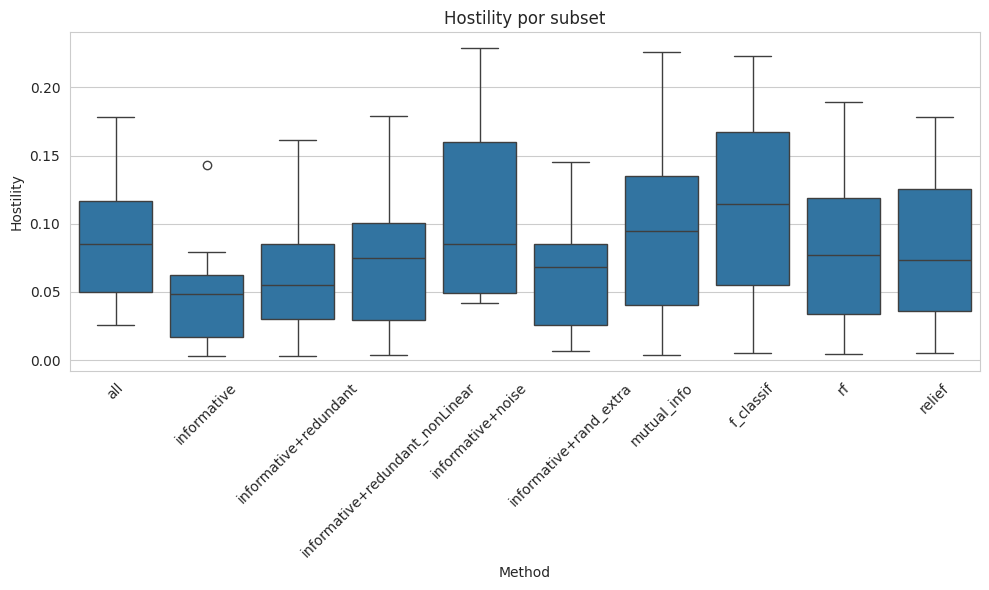

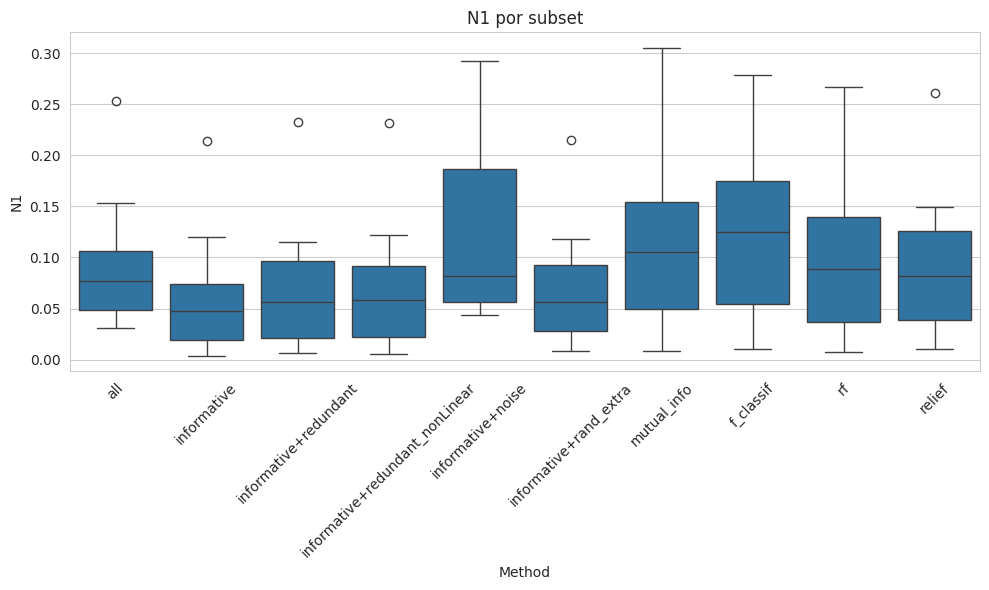

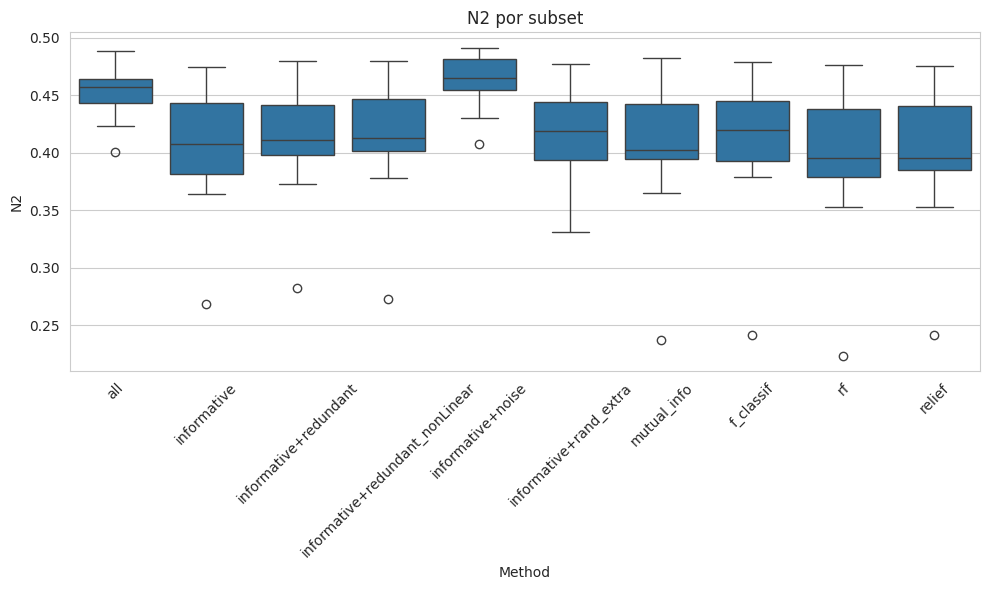

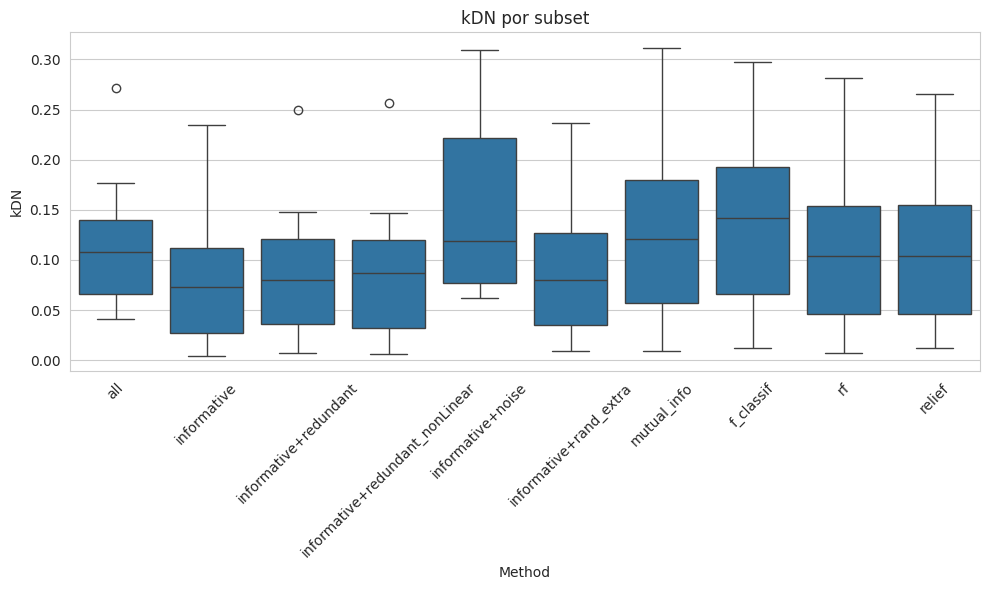

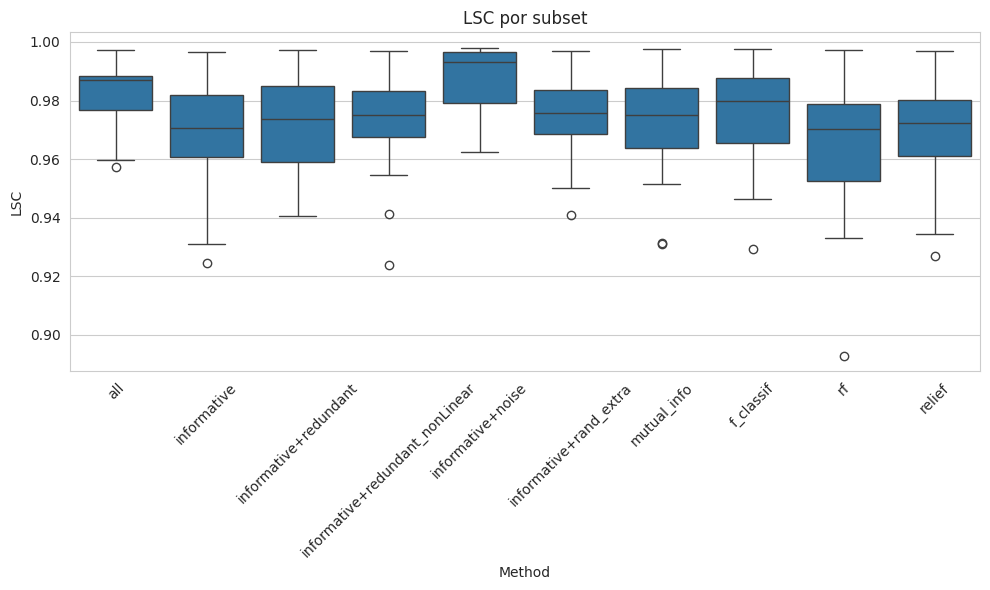

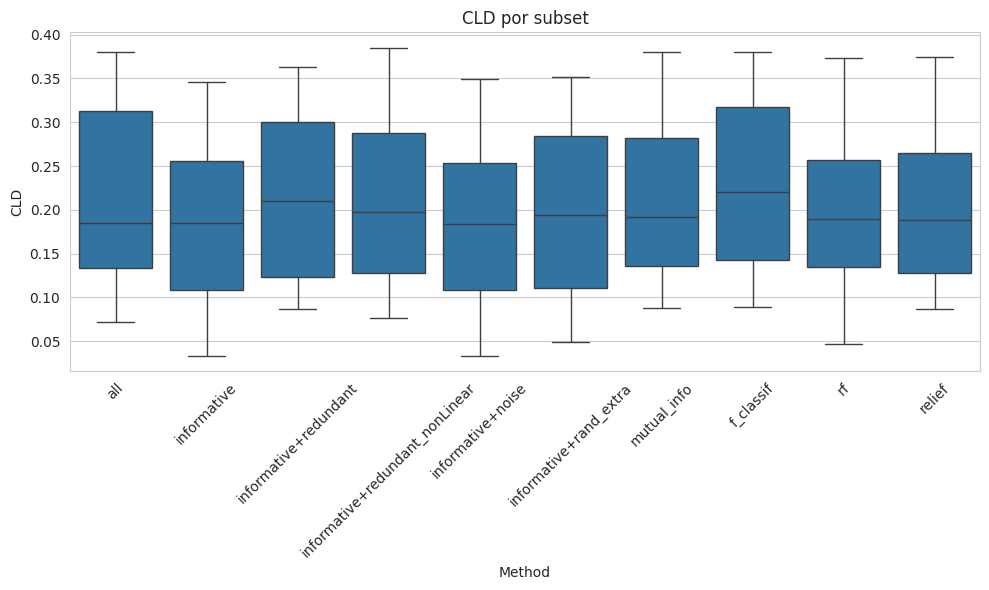

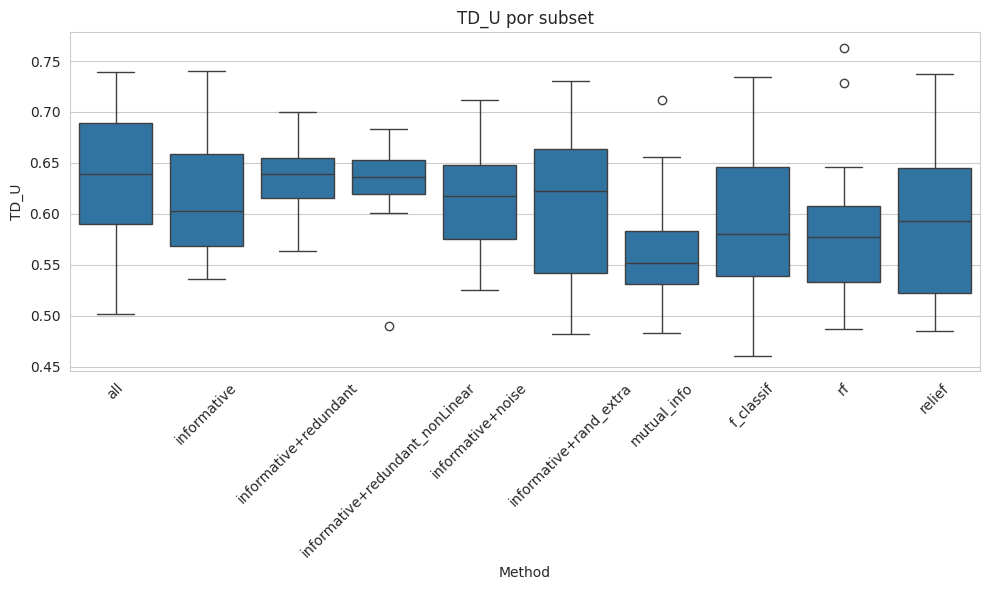

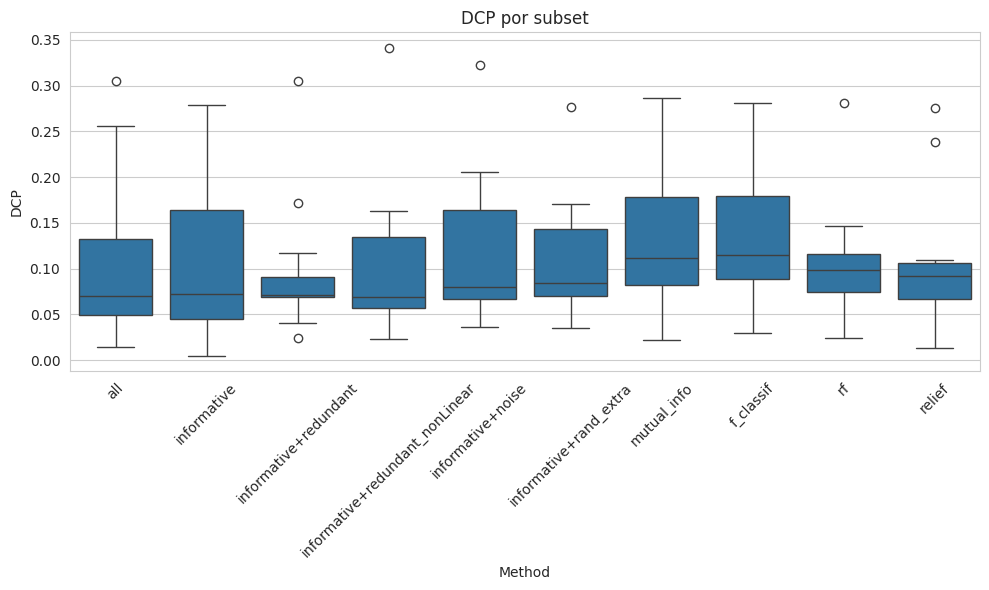

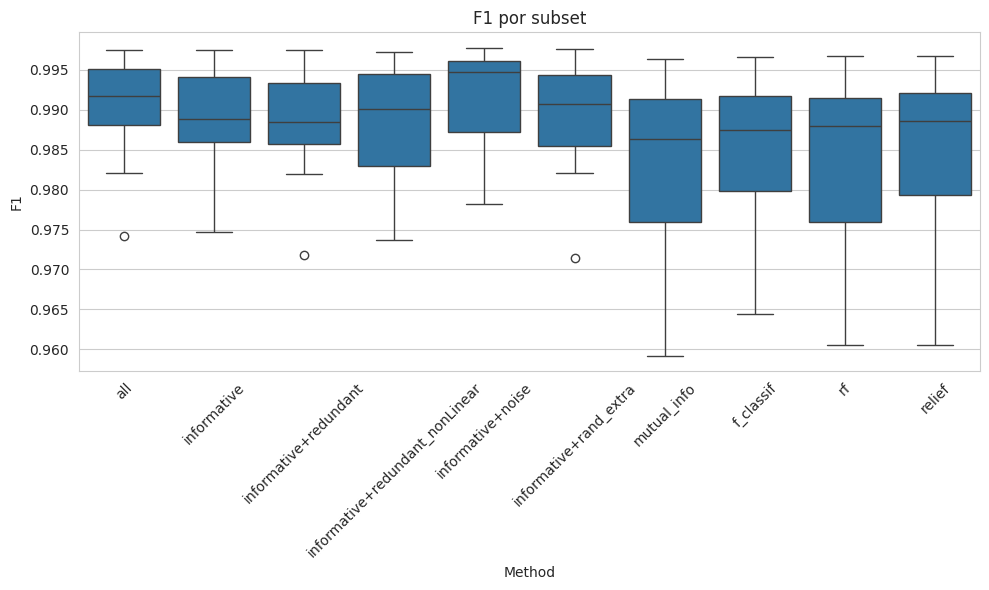

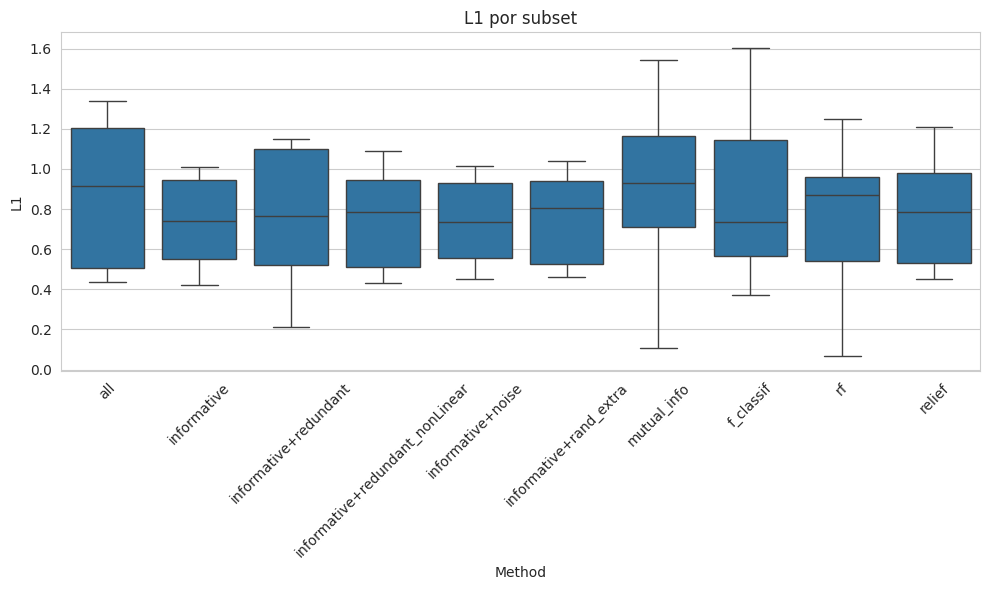

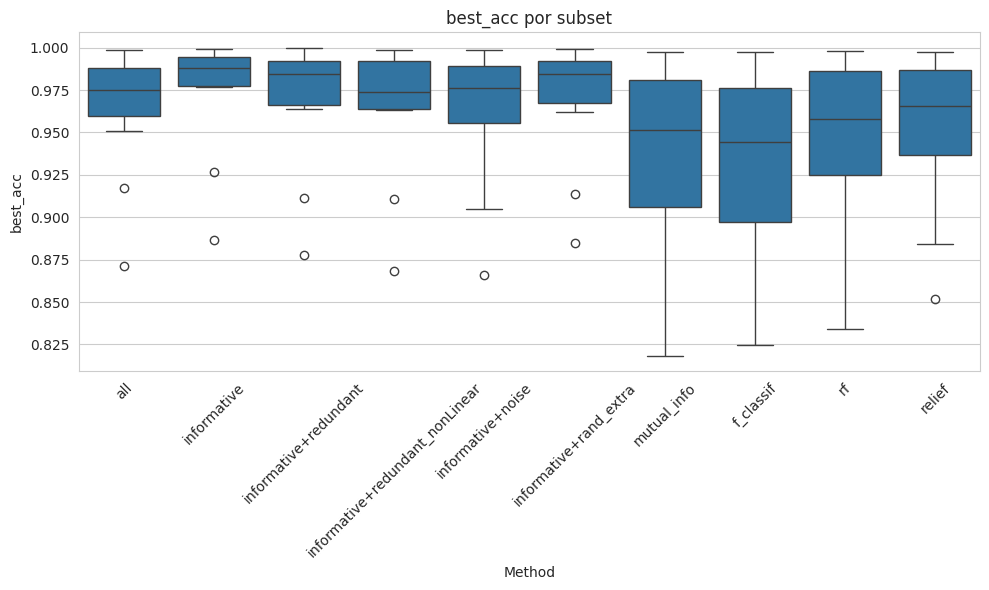

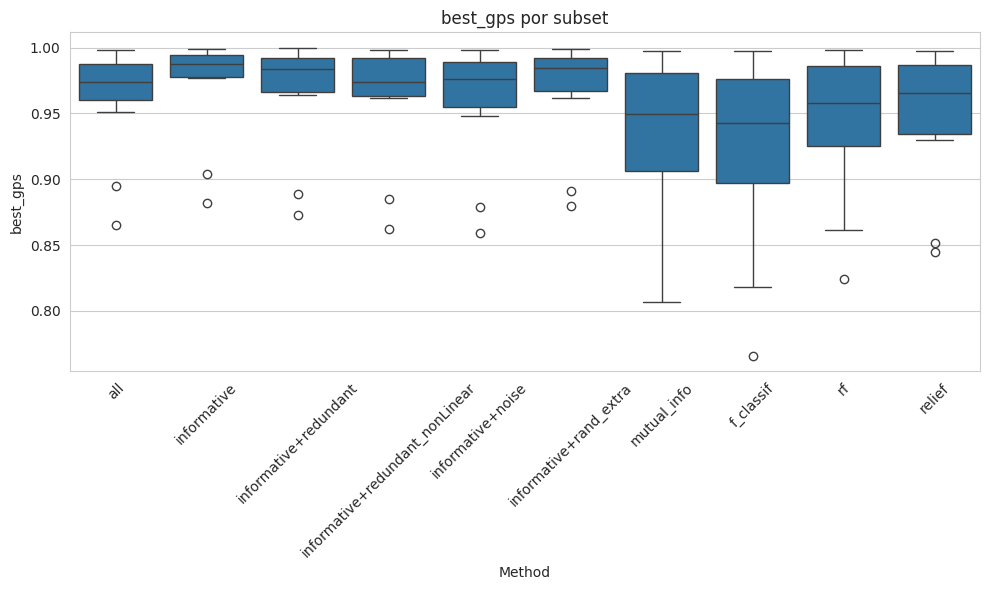

In [53]:
for measure in ["Hostility","N1","N2","kDN","LSC","CLD","TD_U","DCP","F1","L1","best_acc","best_gps"]:
    plot_boxplots(combined, measure)
    # plot_boxplots(combined, measure, savepath=f"boxplot_{measure}.png")